<center><h1>Embedded Simulation with Cadmium v2</h1></center>

<br></br>

<center><h2>Ezequiel Pecker-Marcosig</h2></center>
<center><h4><font color=blue>emarcosig@dc.uba.ar</font></h4></center>

<br></br>
<center><h3><font color=gray>Discrete-Event Simulations Lab (SEDLab)</font></h3></center>
<center><h3><font color=gray>Computing Department (DC), Research Institute of Computer Science (ICC)</font></h3></center>
<center><h3><font color=gray>School of Exact and Natural Sciences (FCEyN), University of Buenos Aires (UBA)</font></h3></center>

<center><h3><font color=gray>Argentina</font></h3></center>


# Table of Contents

* [Introduction](#intro)
* [Cadmium v2](#cadmium-v2)
* [Mbed-OS](#mbed-os)
* [Example: Blinky LED](#example-blinky-led)
* [Next steps](#next-steps)

<a id='intro'></a>
# Introduction

In this tutorial I'm going to talk about:
1. How to **work** with the **Cadmium v2 simulator** to build an application to run **embedded**.
2. How to **debug** this application through simulations on PC.
3. How to **log events** for debugging when running **embedded** and print it through the serial port.
4. How to **reduce the memory footprint** for the executable to allow us to use cheaper hardware to run embedded aplications.

# This presentation

This presentation is witten in a jupyter notebook. This is publicly available on Github. To clone this run:
```bash
$ git clone git@github.com:epecker/jupyter-cadmiumv2.git
```

Alternatively, the notebook can be followed directly in Github.

Most of the content is left for reference, but I will skipt during this presentation.

<a id='cadmium-v2'></a>
# Cadmium v2

Cadmium v2 [[1]](https://www.sciencedirect.com/science/article/pii/S1569190X22001198) is a brand new version of the Cadmium simulator toolkit [[2]](https://ieeexplore.ieee.org/document/9004917) that is implemented as a header-only C++ library. This new version of Cadmium is publicly available on GitHub [[3]](https://github.com/SimulationEverywhere/cadmium_v2).

The documentation for Cadmium v2 can be found in this [wiki](https://github.com/SimulationEverywhere/cadmium_v2/wiki).

To run Cadmium v2 embedded we are going to use the branch [rt-dev](https://github.com/SimulationEverywhere/cadmium_v2/tree/dev-rt) in the repo that was developed by Jon, Román and Guille.

This code for Cadmium v2 runs on top of the [Mbed-OS](https://os.mbed.com/mbed-os/) real-time operating system at the user-application level.

### References
* [1] Cárdenas, R., & Wainer, G. (2022). Asymmetric Cell-DEVS models with the Cadmium simulator. Simulation Modelling Practice and Theory, 121, 102649.
* [2] Belloli, L., Vicino, D., Ruiz-Martin, C., & Wainer, G. (2019, December). Building devs models with the cadmium tool. In 2019 Winter Simulation Conference (WSC) (pp. 45-59). IEEE.
* [3] Cárdenas, R., Trabes, G., 2022. Cadmium 2: an object-oriented C++ M&S platform for the PDEVS formalism. [Online; Accessed on: November, 24, 2022] Available at https://github.com/SimulationEverywhere/cadmium_v2.

## Setting up the environment

In this presentation we are going to work with a copy of the Github repo for Cadmium v2 that can be found [here](https://github.com/epecker/cadmium_v2). To clone this repo run:

```bash
$ git clone https://github.com/epecker/cadmium_v2.git
```

The snippets shown in this notebook can be run directly in the gray colored cells (by pressing CTRL + ENTER) or just copy the commands into a bash terminal. 

For the ease of presentation I will follow this second approach, so let's skip the next section.

### Running the code in the notebook

Following we load the Python library `pathlib` to allows us define some environmental variables that will be used inside this notebook, and then define some environmental variables in Bash that will be used along this notebook:

In [192]:
from pathlib import Path

CADMIUMV2_HOME = Path.home().joinpath('SED/demo-cadmiumv2')
CADMIUMV2_DIR = CADMIUMV2_HOME.joinpath('cadmium_v2')

CADMIUMV2_SRC = CADMIUMV2_DIR.joinpath('include/cadmium/core')
CADMIUMV2_BLINKY_EXAMPLE = CADMIUMV2_HOME.joinpath('Blinky')
CADMIUMV2_BLINKY_EXAMPLE_TOP = CADMIUMV2_BLINKY_EXAMPLE.joinpath('top_model')
CADMIUMV2_COUNTER7SEG_EXAMPLE = CADMIUMV2_HOME.joinpath('Counter7seg')
CADMIUMV2_COUNTER7SEG_EXAMPLE_TOP = CADMIUMV2_BLINKY_EXAMPLE.joinpath('top_model')

# URL for the repo
CADMIUMV2_TEST_REPO = 'https://github.com/epecker/cadmium_v2.git'
BLINKY_EXAMPLE_REPO = 'https://github.com/epecker/Blinky.git'

Finally, let's clone the repo `CADMIUMV2_TEST_REPO` in folder `CADMIUMV2_HOME` (uncomment and run the following cell):

In [10]:
%%bash -s "$CADMIUMV2_HOME" "$CADMIUMV2_TEST_REPO"

# $1 is the folder we are going to clone cadmium v2 (CADMIUMV2_HOME)
# $2 is the URL for the repo (CADMIUMV2_TEST_REPO)

# check if the folder exists and if it exists the does nothing, otherwise it creates the folder
[ -d $1 ] || mkdir -p $1
cd $1

# check if the folder exists and if it exists the does nothing, otherwise it clones the repo with git clone
[ -d cadmium_v2 ] || git clone $2 

echo "Finished!"

Finished!


Then clone the repo for the Example 1:

In [142]:
%%bash -s "$CADMIUMV2_HOME" "$BLINKY_EXAMPLE_REPO"

# check if the folder exists and if it exists the does nothing, otherwise it clones the repo with git clone
[ -d Blinky ] || git clone $2 

echo "Finished!"

Finished!


Cloning into 'Blinky'...
fatal: could not read Username for 'https://github.com': No such device or address


### Running the code in a terminal

Following we define some environmental variables in Bash that will be used along this notebook:

```bash
$ source define-env.sh
```

Then clone the repo `CADMIUMV2_TEST_REPO` in folder `CADMIUMV2_HOME`:
```bash
[ -d $CADMIUMV2_HOME ] || mkdir -p $CADMIUMV2_HOME
cd $CADMIUMV2_HOME

# check if the folder exists and if it exists the does nothing, otherwise it clones the repo with git clone
[ -d cadmium_v2 ] || git clone $CADMIUMV2_TEST_REPO
echo "Finished!"
```

Then clone the repo for the Example 1:

```bash 
# check if the folder exists and if it exists the does nothing, otherwise it clones the repo with git clone
[ -d Blinky ] || git clone $BLINKY_EXAMPLE_REPO 

echo "Finished!"
```

If everything went OK, under the folder `demo-cadmiumv2` you will find:

In [160]:
%%bash -s "$CADMIUMV2_HOME"

cd $1

ls

Blinky
cadmium_v2
Counter7seg
define-env.sh
jupyter-cadmiumv2


<a id='mbed-os'></a>
# Mbed-OS 

[Mbed-OS](https://os.mbed.com/docs/mbed-os/v6.15/introduction/index.html) is an open-source real-time operating system with support for a wide range of ARM Cortex-M based devices.

It provides an abstraction layer for the microcontrollers it runs on, so a developer does not need to worry about the hardware and can write C/C++ applications that run on any Mbed-enabled board.

Mbed-OS can be donwloaded from this [github repo](https://github.com/ARMmbed/mbed-os).

## Architecture

Here we can see the basic [architecture](https://os.mbed.com/docs/mbed-os/v6.15/introduction/architecture.html) of an Mbed board running Mbed OS.

On top of the RTOS it is the **user application** ,which for us is composed of the Cadmium v2 simulator and the DEVS model running with it.

Moreover, Mbed-OS uses a **Hardware Abstraction Layer** (HAL) to abstract away the low-level hardware details as well as provides [APIs](https://os.mbed.com/docs/mbed-os/v6.15/apis/index.html) to interact with it.

<center>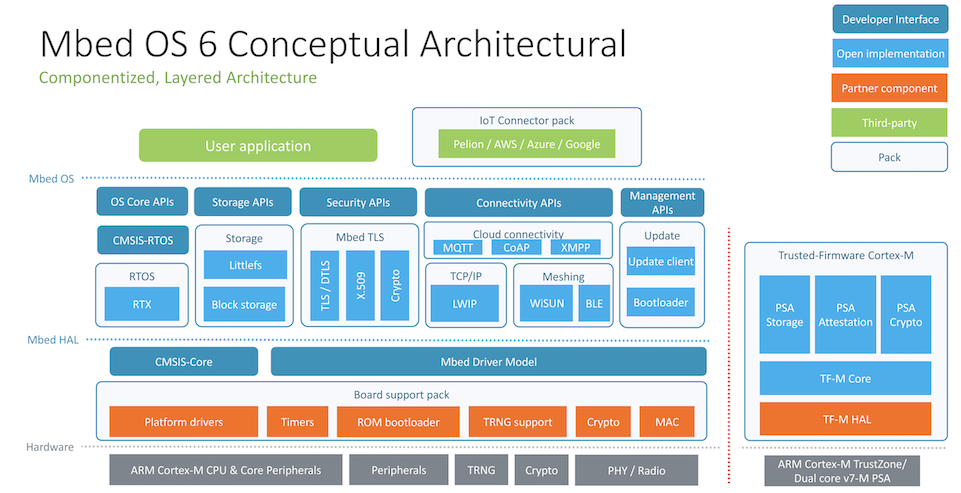</center>

## Tools

Mbed provides [three alternatives](https://os.mbed.com/docs/mbed-os/v6.15/build-tools/index.html) to build an application with Mbed-OS:

* <u>Mbed Studio</u>: Desktop IDE that includes the Arm Compiler 6 (for building) and pyOCD (for debugging). 
* <u>Mbed CLI</u>: **C**ommand **L**ine **I**nterface for Mbed that can make use of different building toolchains and debugging. This is a Python-based building tool. We have two alternatives:
  * **CLI1**
  * CLI2
* <u>Mbed Online Compiler</u>: Web-browser based editor to write and build applications.

In what follows we are going to use **Mbed CLI 1**.

### Mbed CLI

The different building toolchains that can be used with Mbed CLI to build Mbed OS are:

| Compiler | Name in CLI|
| ---------- | ------------ |
| ARM Compiler | ARM |
| GNU ARM Embedded toolchains | GCC_ARM |

In what follows we are going to use the **GNU ARM** toolchain

### Install the ARM GNU Toolchain (GCC ARM Compiler)

The [GNU ARM Embedded Toolchain](https://developer.arm.com/Tools%20and%20Software/GNU%20Toolchain) is a ready-to-use, open-source suite of tools for C, C++ and assembly programming provided by ARM. It includes the GNU Compiler (GCC).

This toolchain targets the 32-bit ARM Cortex-A, ARM Cortex-M, and ARM Cortex-R processor families. 

In what follows I'll assume we are using `gcc-arm-none-eabi-10.3-2021.10` for Linux. To download it, go to this [link](https://developer.arm.com/downloads/-/gnu-rm) and download the corresponding version for your OS:

```bash
$ wget https://developer.arm.com/-/media/Files/downloads/gnu-rm/10.3-2021.10/gcc-arm-none-eabi-10.3-2021.10-x86_64-linux.tar.bz2?rev=78196d3461ba4c9089a67b5f33edf82a&hash=D484B37FF37D6FC3597EBE2877FB666A41D5253B
```

Then, extract GCC ARM:

```bash
$ tar jxf gcc-arm-none-eabi-10.3-2021.10-x86_64-linux.tar.bz2
```

And finally move the GCC ARM Compiler to the `/opt/` folder (requires root privileges):

```bash
$ sudo mv gcc-arm-none-eabi-10.3-2021.10 /opt/
```

We can take a look at ths folder to see all the tools for building and debugging provided by this toolchain:

In [246]:
%%bash
ls /opt/gcc-arm-none-eabi-10.3-2021.10/bin/

arm-none-eabi-addr2line
arm-none-eabi-ar
arm-none-eabi-as
arm-none-eabi-c++
arm-none-eabi-c++filt
arm-none-eabi-cpp
arm-none-eabi-elfedit
arm-none-eabi-g++
arm-none-eabi-gcc
arm-none-eabi-gcc-10.3.1
arm-none-eabi-gcc-ar
arm-none-eabi-gcc-nm
arm-none-eabi-gcc-ranlib
arm-none-eabi-gcov
arm-none-eabi-gcov-dump
arm-none-eabi-gcov-tool
arm-none-eabi-gdb
arm-none-eabi-gdb-add-index
arm-none-eabi-gdb-add-index-py
arm-none-eabi-gdb-py
arm-none-eabi-gprof
arm-none-eabi-ld
arm-none-eabi-ld.bfd
arm-none-eabi-lto-dump
arm-none-eabi-nm
arm-none-eabi-objcopy
arm-none-eabi-objdump
arm-none-eabi-ranlib
arm-none-eabi-readelf
arm-none-eabi-size
arm-none-eabi-strings
arm-none-eabi-strip


Among them we can see:

* `arm-none-eabi-g++`: C++ compiler
* `arm-none-eabi-ld`: Linker
* `arm-none-eabi-size`: Tool to measure the size of our code
* `arm-none-eabi-nm`: Tool to list symbols from object files
* `arm-none-eabi-objdump`: Tool to display information from object files

### Installation and setup of Mbed CLI 1

A step-by-step guide to install the Mbed CLI 1 tool can be found [here](https://os.mbed.com/docs/mbed-os/v6.15/build-tools/install-and-set-up.html). Make sure that all the dependencies are satisfied, otherwise run the following:

```bash
$ sudo apt install python3 python3-pip git
```

Then, to install the `mbed-cli` run:

```bash
$ python3 -m pip install mbed-cli
```

Finally, to configure Mbed CLI 1 we use the command `mbed config`. To print a full list of the available parameters run:

In [ ]:
%%bash
mbed config --help

Next, we use this command to make Mbed know where to find the GCC ARM Compiler that we downloaded before. Given that we are using the GCC ARM Embedded Compiler, we have to set the `GCC_ARM_PATH`:

In [ ]:
%%bash 
mbed config -G GCC_ARM_PATH /opt/gcc-arm-none-eabi-10.3-2021.10/bin

where the `-G` means that this setting is global, i.w. it applies to all the applications compiled with Mbed CLI 1.

## Building with Mbed CLI 1

For [building](https://os.mbed.com/docs/mbed-os/v6.15/build-tools/compile.html) our application we use `mbed compile`. To print a full list of the available parameters run:

In [ ]:
%%bash
mbed compile -h

We see that for building an application with Mbed CLI 1 we use the following command:
```bash
$ mbed compile -m <TARGET> -t <TOOLCHAIN> --profile <PROFILE> --flash.
```
where the \<TARGET\> depends on the MCU, the \<TOOLCHAIN\> corresponds to `ARM GCC`, and the \<PROFILE\> is used to pass options to the compilers.

The resulting files after building can be found under `BUILD/<TARGET>/<TOOLCHAIN>-<PROFILE>/`. They are:

* `<PROJECT_NAME>.bin`: Executable file (pure binary).
* `<PROJECT_NAME>.elf`: Executable file that includes additional information.
* `<PROJECT_NAME>.map`: Map file used by the linker.

Then we have to flash the file `<PROJECT_NAME>.bin` in the MCU. In STM boards provided with a ST-Link programmer, this is done by simply copying the `bin` file in the USB mass storage device created when plugging the board to the PC.

It is worth mentioning that `mbed compile` scans our project looking for source files to compile. To [exclude](https://os.mbed.com/docs/mbed-os/v6.15/program-setup/build-rules.html) some file or folder we have to write an `.mbedignore` file.

## Build profiles

As we mentioned before, the [build profiles](https://os.mbed.com/docs/mbed-os/v6.15/program-setup/build-profiles-and-rules.html) are used to pass options to the compilers (e.g. `arm-none-eabi-g++`) and the linker (`arm-none-eabi-ld`). These files are then passed to `mbed compile` with the option `--profile`.

A user counts on a set of pre-defined profiles or can write its own profile. Take into account that more than one build profile can b specified by calling multiple times to `--profile`.

### Pre-defined build profiles

There are 3 pre-defined [profiles](https://os.mbed.com/docs/mbed-os/v6.15/program-setup/build-profiles-and-rules.html#release):

* `Develop`: (`--profile develop`) this profile provides small and fast code.
* `Debug`: (`--profile debug`) this profile provides the largest and slowest performance.
* `Release`: (`--profile release`) this features the smallest code size and still fast. 

### User-defined build profiles

A user can also create their own custom build profile using a [JSON files](https://os.mbed.com/docs/mbed-os/v6.15/program-setup/build-profiles-and-rules.html#JSON-build-profile-format:~:text=the%20command%20line.-,JSON%20build%20profile%20format,-The%20build%20profiles) with the root object containing key-value pairs for each supported toolchain, in our case this is `GCC_ARM`. Then, the following keys can used to specify:

* `c`: Flags for the C Compiler
* `cxx`: Flags for the C++ Compiler
* `common`: Flags for _both_ the C and C++ Compilers
* `ld`: Flags for the Linker

Some common options for the c and c++ compilers are: `-Wall`(for enabling all warning flags during complation), `-Wextra` (for enabling extra warning flags), "-Os" (for optimizing for size), etc. 

In addition, a user can specify definitions with the option `-D` as if they have been created with the `#define` directive.

Let's see how this file looks like for the Blinky example that we will see shortly:

In [ ]:
%%bash -s "$CADMIUMV2_BLINKY_EXAMPLE"
cd $1
cat cadmium_logging_off.json

## Configuration system for Mbed-OS

The [Configuration system](https://os.mbed.com/docs/mbed-os/v6.15/program-setup/advanced-configuration.html) for Mbed OS allows to customize compile-time configuration parameters. For instance, the baudrate used for the serial-USB debug interface. A full list of the configuration parameters can be seen [here](https://os.mbed.com/docs/mbed-os/v5.15/reference/configuration-platform.html)

A user can modify this configuration parameters for a given application by means of the file JSON-formatted file `mbed_app.json`. Let's take a look at the corresponding file for the Blinky example:

In [ ]:
%%bash -s "$CADMIUMV2_BLINKY_EXAMPLE"
cd $1
cat mbed_app.json

In this example the specified target is `"*"` meaning that the following settings apply to all the boards.

For instance, with the option `"target.printf_lib": "minimal-printf"` we are telling Mbed-OS to make use of a reduced version for the function `printf()` given that the standard version (`"std"`) requires more flash memory. 

We can also notice the use of the macro `NDEBUG`, by means of which we can get a reduction on memory usage ([link](https://os.mbed.com/blog/entry/Optimizing-memory-usage-in-mbed-OS-52/)).

<a id='example-blinky-led'></a>
# Example: Blinky LED

This is the _"Hello World!"_ example but for embedded systems. 

In this system a LED blinks at a given rate set in runtime by the user between two values (0.75s and 3s). The user can choose one value or the other by means of a push button. The state of this button is continuously polled (once every 0.1s).

<center><img src="img/circuit.svg" alt="Circuit" width="300"/></center>

## Model description

We are going to build a DEVS model that represents this behavior. This model is composed of three atomic models:
* Blinky
* Digital Input
* Digital Output

The last two models are pre-built and come with the simulator. Therefore, we only have to build and test the Blinky atomic model. This Blinky model will periodically schedule an internal event to toggle the value on its output port.

## Model and simulator

This is the model that we will be using across all the design stages:

<center><img src="img/blinky-v2.svg" alt="Model" width="600"/></center>

We have introduced a Generator model to simulate the user randomly acting on the push button. The _switces_ are used to choose which models are used depending on the stage we are: simulation (debug) or running embedded.

In simulation, we assess that the models behave the way they are expected.

### Simulation

In simulation-time we conduct some experiments to check that the Blinky model behaves as expected. To this end, we introduced the Generator that generates events randomly distributed in time:

<center><img src="img/blinky-simulation.svg" alt="Model" width="500"/></center>

### Embedded

Once we are happy with how the Blinky model works, we disconnect the Generator and connect the Digital Input and Digital Output atomic models.

<center><img src="img/blinky-embedded.svg" alt="Model" width="500"/></center>

#### Model architecture for running embedded

The model and the simulator are then built to produce an executable that will run as a user appication on top of Mbed-OS. This last provides the I/O API to let the Digital Input and Output atomic models interact with the real I/O ports:

<center><img src="img/blinky-arch-2.svg" alt="Architecture" width="600"/></center>

## Implementation in Cadmium v2

Let's move to the folder where we have cloned the repo for this example and take a look to the files that compose this application under `Blinky/top_model/`:

The model is under the folder `top_model/`. This folder contains: 

In [ ]:
%%bash -s "$CADMIUMV2_BLINKY_EXAMPLE"

cd $1/top_model
make clean
ls -R

## Main file

The main file for the application is `main_rt_model.cpp`, where they are created an instance of the **root coordinator**, the **top model**, and the simulation **logger** (if any).

First we have to create an instance of the top model (`blinkySystem`) and pass it to the root coordinator that is in charge of running the simulation:
```c++
auto model = std::make_shared<blinkySystem>("blinkySystem");
auto rootCoordinator = cadmium::RootCoordinator(model);
```

Then, to create a simulation logger (to log all the events) and pass it to the root coordinator we use:
```c++
auto logger = std::make_shared<cadmium::CSVLogger>("blinkyLog.csv",";");
rootCoordinator.setLogger(logger);
```

Finally, to start the simulation and specify the simulation time (e.g. 1000s) we use:
```c++
rootCoordinator.start();
rootCoordinator.simulate(1000.0);
rootCoordinator.stop();
```

We will see two defines in the code that follows:
* `RT_ARM_MBED`: play the role of the switches that we saw before to decide whether to build the executable for simulation (PC) or for running embedded.
* `NO_LOGGING`: used to remove all the code related to logging to reduce the size of the executable (more on this later).

Then, let's see how the `main_rt_model.cpp` file looks like:

In [ ]:
%%bash -s "$CADMIUMV2_BLINKY_EXAMPLE"

cd $1/top_model
cat main_rt_model.cpp

## Top model

The definition of the **top model** for this model is in `blinkySystem.hpp`. This coupled model has no input nor output ports and comprises three atomic models:
1. Blinky
2. DigitalInput
3. DigitalOutput

To add a new component we use:  
```c
auto generator = addComponent<Generator>("generator");
```

We could also specify some parameters, e.g. the I/O ports for the Digital Input and Digital Output atomic models:

```c
auto digitalOutput = addComponent<DigitalOutput>("digitalOuput", LED1);
auto digitalInput  = addComponent<DigitalInput>("digitalInput", PC_13);
```

[Here](https://os.mbed.com/platforms/ST-Nucleo-F401RE/) you can find the pinout for the NUCLEO F401RE board.

To specify a coupled model we have to set the EIC, EOC and IC. In this example, the internal coupling between the atomic models are set with:
```c
addCoupling(digitalInput->out, blinky->in);
addCoupling(blinky->out, digitalOutput->in);
```

Let's see how it looks like everything toghether:

In [ ]:
%%bash -s "$CADMIUMV2_BLINKY_EXAMPLE"

cd $1/top_model/include/
cat blinkySystem.hpp

## Blinky atomic model

As an example let's see how the Blinky atomic model is specified in Cadmium v2.

The Blinky atomic model has:
* one input port `in`, 
* one output port `out`
* two parameters: `slowToggleTime` and `fastToggleTime` (expressed in seconds)

The state for this atomic model is `BlinkyState` and includes: 
* `lightOn`: this state toggles periodicaly
* `fastToggle`: this state retains the blinking rate chosen by the user
* `sigma`:

The state is specified with a structure as follows:
```c++
struct BlinkyState {
	double sigma;
	bool lightOn;
	bool fastToggle;
	//! Blinky state constructor.
	BlinkyState(): sigma(0), lightOn(false), fastToggle(false)  {}
};
```

For this model we have the class `Blinky` that is derived from the class `Atomic`. In the constructor for this class we set the values for the two possible blinking rates (0.75s and 3s) and schedule the next internal event:
```C++
Blinky(const std::string& id): Atomic<BlinkyState>(id, BlinkyState()) {
	out = addOutPort<bool>("out");
	in  = addInPort<bool>("in");
	slowToggleTime = 3.0;  
	fastToggleTime = 0.75;
	state.sigma = fastToggleTime;
}
```

In the internal transition function the state `lightOn` is toggled:
```c++
void internalTransition(BlinkyState& state) const override {
	state.lightOn = !state.lightOn;
}
```

When the push button is pressed and external event arrives 

In the external transition function, after the arrival of an external event, the state `fastToggle` is updated and with it the state `sigma`: 
```c++
void externalTransition(BlinkyState& state, double e) const override {
	if(!in->empty()) {
		for( const auto x : in->getBag()){
			if (x==0)
				state.fastToggle = !state.fastToggle;
		}

		if(state.fastToggle)
			state.sigma = fastToggleTime;
		else
			state.sigma = slowToggleTime;
	}
}
```
    
Finally, the output function copies the value of the state `lightOn` in the output port:
```c++
void output(const BlinkyState& state) const override {
	out->addMessage(state.lightOn);
}
```

For logging purposes we have to transform the structure-shaped state into a string. This is left to the user the responsability to define this transformation by overriding the insertion operator `<<`. In this example, after every event we want to log the state of `ligthOn` and `sigma`:
```c++
std::ostream& operator<<(std::ostream &out, const BlinkyState& state) {
	out << "Status:, " << state.lightOn << ", sigma: " << state.sigma;
	return out;
}
```

All this definition of the behaviour for the blinky atomic model is in `blinky.hpp`:

In [ ]:
%%bash -s "$CADMIUMV2_BLINKY_EXAMPLE"

cd $1/top_model/include/
cat blinky.hpp

## Validation of the model

We have to evaluate the model via simulations to make sure that it works according to the specification.

To simulate the model in PC we compile the model and simulator with:

In [249]:
%%bash -s "$CADMIUMV2_BLINKY_EXAMPLE"

cd $1/top_model

g++ -g -c -std=c++17 -I ../../cadmium_v2/include/ -I include/ main_rt_model.cpp -o main.o
g++ -g -o Blinky main.o

Then an executable file `Blinky` is created. To run the model we use:

In [250]:
%%bash -s "$CADMIUMV2_BLINKY_EXAMPLE"
cd $1/top_model
./Blinky

Since we have configured a CSV logger in the **root coordinator** we can see the events and outputs of the simulation and check that the model works well, the format is:
```csv
<time>; <atomic_model_id>; <atomic_model_name>; <atomic_port_name>; <value>
```

In [251]:
%%bash -s "$CADMIUMV2_BLINKY_EXAMPLE"
cd $1/top_model
head blinkyLog.csv -n15

time;model_id;model_name;port_name;data
0;1;blinky;;Status:, 0, sigma: 0.75
0;2;generator;;Status:, 0
0.75;1;blinky;out;0
0.75;1;blinky;;Status:, 1, sigma: 0.75
1.5;1;blinky;out;1
1.5;1;blinky;;Status:, 0, sigma: 0.75
2.25;1;blinky;out;0
2.25;1;blinky;;Status:, 1, sigma: 0.75
3;1;blinky;out;1
3;1;blinky;;Status:, 0, sigma: 0.75
3.75;1;blinky;out;0
3.75;1;blinky;;Status:, 1, sigma: 0.75
4.5;1;blinky;out;1
4.5;1;blinky;;Status:, 0, sigma: 0.75


We can see that the Blinky atomic model is producing an internal event after 0.75 seconds (`fastToggleTime`).

Then, for the sake of simplicity we plot the events received by the Blinky atomic model when the button was pressed and the events generated accordingly on its output:

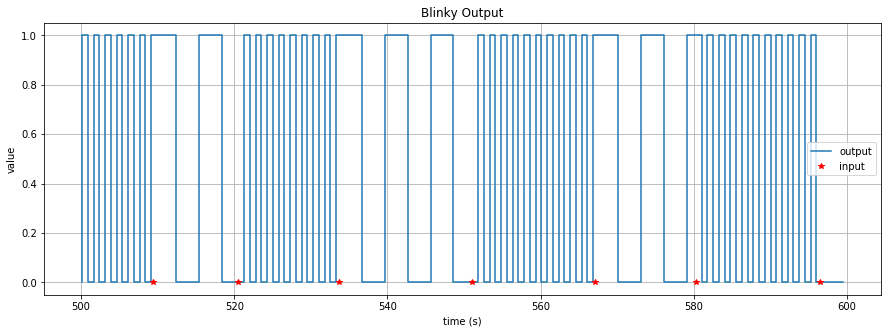

In [252]:
import matplotlib.pyplot as plt

LOGFILE = str(CADMIUMV2_BLINKY_EXAMPLE)+'/top_model/'+'blinkyLog.csv'

tblk_list = []
outblk_list = []
tgen_list = []
outgen_list = []

# TODO: replace the following with pandas
with open(LOGFILE,'r') as f:
    for line in f.readlines():
        # debug
        # print(line)
        t,atomic_id,atomic_name,port_name,val = line.split(";")
        if (atomic_name=="blinky" and port_name=="out"):
            tblk_list.append(float(t))
            outblk_list.append(int(val.split(" ")[-1]))
        elif (atomic_name=="generator" and port_name=="out"):
            tgen_list.append(float(t))
            outgen_list.append(int(val.split(" ")[-1]))

f.close()

T1 = 500
T2 = 600
tblk = [x for x in tblk_list if x<T2 and x>T1]
outblk = outblk_list[:len(tblk)]
tgen = [x for x in tgen_list if x<T2 and x>T1]
outgen = outgen_list[:len(tgen)]

plt.figure(figsize=(15,5))
# plt.step(tblk_list[0:150],outblk_list[0:150])
# plt.plot(tgen_list[0:14],outgen_list[0:14],'r*')
plt.step(tblk,outblk,label='output')
plt.plot(tgen,outgen,'r*',label='input')
plt.title('Blinky Output')
plt.xlabel('time (s)')
plt.ylabel('value')
plt.legend()
plt.grid(True)

Then we see that the output of the Blinky model (blue line) toggles between 0 and 1, and the rate of blinking changes after receiving an input event (red star).

## Building and flashing the model in the hardware

Since we checked that the model behaves as expected, then it is time to embed it in the MCU. 

We are concerned on producing lighter applications with the ability to send back data to debug them easily.

To build this model we use `mbed compile`, being the target a NUCLEO F401RE board (with an ARM Cortex M4 STM32F401RE) and the profile `cadmium_logging_off.json`:

In [187]:
%%bash -s "$CADMIUMV2_BLINKY_EXAMPLE"
cd $1/top_model
# make
mbed compile --target NUCLEO_F401RE --toolchain GCC_ARM --profile ../cadmium_logging_off.json

[Warning] @,: Compiler version mismatch: Have 10.3.1; expected version >= 6.0.0 and < 7.0.0
Building project Blinky (NUCLEO_F401RE, GCC_ARM)
Scan: Blinky
Link: Blinky
Elf2Bin: Blinky
| Module                    |     .text |    .data |    .bss |
|---------------------------|-----------|----------|---------|
| [fill]                    |   118(+0) |    8(+0) |  23(+0) |
| [lib]/c.a                 | 26128(+0) | 2472(+0) |  58(+0) |
| [lib]/gcc.a               |  6924(+0) |    0(+0) |   0(+0) |
| [lib]/misc                |   188(+0) |    4(+0) |  28(+0) |
| [lib]/nosys.a             |    32(+0) |    0(+0) |   0(+0) |
| [lib]/stdc++.a            |  6568(+0) |    8(+0) |  44(+0) |
| mbed-os/drivers           |   906(+0) |    0(+0) |   0(+0) |
| mbed-os/hal               |  1424(+0) |    4(+0) |  66(+0) |
| mbed-os/platform          |  2978(+0) |  260(+0) | 225(+0) |
| mbed-os/targets           |  5806(+0) |    4(+0) | 348(+0) |
| top_model/main_rt_model.o | 13088(+0) |    0(+0) |   0(+0) 

This last command shows a summary of all the compiled files and libraries and their sizes: 
* The **Total Flash memory** required to run the Blinky example (cadmium v2 simulator + blinky model) embedded is <font color=red>66920 bytes</font> 
* The **Total Static RAM memory** is <font color=red>3552 bytes</font>. 
* Cadmium v2 contributes with 13088 bytes, whereas 
* Mbed-OS adds 11114 bytes, and 
* The rest are C++ libraries.

Then the embedded application can run with a low performance MCU such as the STM32F103RB (ARM Cortex M3) that comes with the NUCLEO F103RB board or the Arduino Bluepill which count with 128 kB of flash.


It can be noticed that a folder `BUILD` is created in the root folder for this example containing several files including the executable `Blinky.bin`:

In [189]:
%%bash -s "$CADMIUMV2_BLINKY_EXAMPLE"
cd $1/BUILD/NUCLEO_F401RE/GCC_ARM-CADMIUM_LOGGING_OFF
ls
du -h *.bin

Blinky.bin
Blinky.elf
Blinky.map
Blinky_map.csv
Blinky_map.html
Blinky_map.json
Blinky.map.old
mbed_config.h
mbed-os
top_model
76K	Blinky.bin


It can be noticed that the size for the executable file `Blinky.bin` is slightly over the size reported by `mbed compile`.

Finally, to flash the binary file in the board we simply copy the bin file in the USB mass storage device created after plugging the board to the PC:

```bash
$ sudo cp $CADMIUMV2_BLINKY_EXAMPLE/BUILD/NUCLEO_F401RE/GCC_ARM-CADMIUM_LOGGING_OFF/*.bin /media/$USER/NOD_F401RE/
```

## Logging events when running embedded

If we replace the CSV logger configured in the **root coordinator** for a RT logger that prints the events and outputs of the simulation through the serial port we can have a log similar to the one we saw before but for the embedded application.

In adition, we have to enable logging in Cadmium v2 by removing the flag `NO_LOGGING` from the profile and then recompile.

In [200]:
%%bash -s "$CADMIUMV2_BLINKY_EXAMPLE"
cd $1/top_model
# make
mbed compile --target NUCLEO_F401RE --toolchain GCC_ARM --profile ../cadmium_logging_on.json --flash

[Warning] @,: Compiler version mismatch: Have 10.3.1; expected version >= 6.0.0 and < 7.0.0
Building project Blinky (NUCLEO_F401RE, GCC_ARM)
Scan: Blinky
Link: Blinky
Elf2Bin: Blinky
| Module                    |           .text |       .data |        .bss |
|---------------------------|-----------------|-------------|-------------|
| [fill]                    |       146(+146) |       9(+9) |     27(+27) |
| [lib]/c.a                 |   72504(+72504) | 2574(+2574) |     97(+97) |
| [lib]/gcc.a               |     7256(+7256) |       0(+0) |       0(+0) |
| [lib]/misc                |       188(+188) |       4(+4) |     28(+28) |
| [lib]/nosys.a             |         32(+32) |       0(+0) |       0(+0) |
| [lib]/stdc++.a            | 175004(+175004) |   145(+145) | 5720(+5720) |
| mbed-os/drivers           |       906(+906) |       0(+0) |       0(+0) |
| mbed-os/hal               |     1424(+1424) |       4(+4) |     66(+66) |
| mbed-os/platform          |     3006(+3006) |   260(+26

After doing this, we can notice that: 
* The **Total Flash memory** required increased to <font color=red>284468 bytes</font>.
* Cadmium v2 contributes with 15196 bytes, whereas 
* Mbed-OS adds 11142 bytes, and 
* The rest are C++ libraries, with the major contribution is done by the `stdlibc++` with <font color=red>175004 bytes</font>.

If we dive into the `stdlibc++` we would see that this increase in the memory footprint is due to the use of `streamstrings` for formatting the atomics' states and outputs as strings, **even if they are not being logged**. 

This executable for such a simple example might not be run embedded in a modest-performance hadware. Let's see what happen if we try to compile for NUCLEO F103RB:

In [201]:
%%bash -s "$CADMIUMV2_BLINKY_EXAMPLE"
cd $1/top_model
# make
mbed compile --target NUCLEO_F103RB --toolchain GCC_ARM --profile ../cadmium_logging_on.json

[Warning] @,: Compiler version mismatch: Have 10.3.1; expected version >= 6.0.0 and < 7.0.0
Building project Blinky (NUCLEO_F103RB, GCC_ARM)
Scan: Blinky
Compile [100.0%]: main_rt_model.cpp
Link: Blinky
/opt/gcc-arm-none-eabi-10.3-2021.10/bin/../lib/gcc/arm-none-eabi/10.3.1/../../../../arm-none-eabi/bin/ld: ../BUILD/NUCLEO_F103RB/GCC_ARM-CADMIUM_LOGGING_ON/Blinky.elf section `.text' will not fit in region `FLASH'
/opt/gcc-arm-none-eabi-10.3-2021.10/bin/../lib/gcc/arm-none-eabi/10.3.1/../../../../arm-none-eabi/bin/ld: region `FLASH' overflowed by 193496 bytes
collect2: error: ld returned 1 exit status
[ERROR] /opt/gcc-arm-none-eabi-10.3-2021.10/bin/../lib/gcc/arm-none-eabi/10.3.1/../../../../arm-none-eabi/bin/ld: ../BUILD/NUCLEO_F103RB/GCC_ARM-CADMIUM_LOGGING_ON/Blinky.elf section `.text' will not fit in region `FLASH'
/opt/gcc-arm-none-eabi-10.3-2021.10/bin/../lib/gcc/arm-none-eabi/10.3.1/../../../../arm-none-eabi/bin/ld: region `FLASH' overflowed by 193496 bytes
collect2: error: ld re

[mbed] ERROR: "/usr/bin/python3" returned error.
       Code: 1
       Path: "/home/piter/SED/demo-cadmiumv2/Blinky/top_model"
       Command: "/usr/bin/python3 -u /home/piter/SED/demo-cadmiumv2/Blinky/mbed-os/tools/make.py -t GCC_ARM -m NUCLEO_F103RB --profile ../cadmium_logging_on.json --source .. --build ../BUILD/NUCLEO_F103RB/GCC_ARM-CADMIUM_LOGGING_ON"
       Tip: You could retry the last command with "-v" flag for verbose output
---


CalledProcessError: Command 'b'cd $1/top_model\n# make\nmbed compile --target NUCLEO_F103RB --toolchain GCC_ARM --profile ../cadmium_logging_on.json\n'' returned non-zero exit status 255.

The error says that:

> Blinky.elf section .text will not fit in region FLASH
>
> region FLASH overflowed by 193496 bytes

So, the resulting executable overflows the 128kB of flash memory for the NUCLEO-F103RB by <font color=red>193496 bytes </font> 🤯

Let's use the NUCLEO F401RE board and see how it looks like the logging in this case:

In [235]:
import matplotlib.pyplot as plt
import serial

# serial port parameters
PORT = '/dev/ttyACM0'
BAUDRATE = 9600

tblk_list = []
outblk_list = []
tdin_list = []
outdin_list = []

with serial.Serial(PORT, BAUDRATE, timeout=1) as ser:
    for i in range(0,20):
        line = ser.readline()
        print(line.decode("utf-8").split(";"))

['', '3', 'blinky', '', 'Status:, 0, sigma: 0.75\n']
['96.75', '1', 'digitalOuput', '', 'Pin: 0\n']
['96.75', '3', 'blinky', 'out', '0\n']
['96.75', '3', 'blinky', '', 'Status:, 1, sigma: 0.75\n']
['97.5', '1', 'digitalOuput', '', 'Pin: 1\n']
['97.5', '3', 'blinky', 'out', '1\n']
['97.5', '3', 'blinky', '', 'Status:, 0, sigma: 0.75\n']
['98.25', '1', 'digitalOuput', '', 'Pin: 0\n']
['98.25', '3', 'blinky', 'out', '0\n']
['98.25', '3', 'blinky', '', 'Status:, 1, sigma: 0.75\n']
['99', '1', 'digitalOuput', '', 'Pin: 1\n']
['99', '3', 'blinky', 'out', '1\n']
['99', '3', 'blinky', '', 'Status:, 0, sigma: 0.75\n']
['99.75', '1', 'digital100.5', '1', 'digitalOuput', '', 'Pin: 1\n']
['100.5', '3', 'blinky', 'out', '1\n']
['100.5', '3', 'blinky', '', 'Status:, 0, sigma: 0.75\n']
['101.25', '1', 'digitalOuput', '', 'Pin: 0\n']
['101.25', '3', 'blinky', 'out', '0\n']
['101.25', '3', 'blinky', '', 'Status:, 1, sigma: 0.75\n']
['102', '1', 'digitalOuput', '', 'Pin: 1\n']


For the sake of simplicity we plot the events received by the Blinky atomic model when the button was pressed and the events generated accordingly on its output:

In [241]:
import matplotlib.pyplot as plt
import serial

# serial port parameters
PORT = '/dev/ttyACM0'
BAUDRATE = 9600

tblk_list = []
outblk_list = []
tdin_list = []
outdin_list = []

with serial.Serial(PORT, BAUDRATE, timeout=1) as ser:
    for i in range(0,200):
        line = ser.readline()
        # debug
        # print(line)
        if len(line.decode("utf-8").split(";")) != 5:
            continue
        t,atomic_id,atomic_name,port_name,val = line.decode("utf-8").split(";")
        if (atomic_name=="blinky" and port_name=="out"):
            # print(line)
            tblk_list.append(float(t))
            outblk_list.append(int(val.split(" ")[-1]))
        elif (atomic_name=="digitalInput" and port_name=="out" and int(val)==0):
            # print(line)
            tdin_list.append(float(t))
            outdin_list.append(int(val))

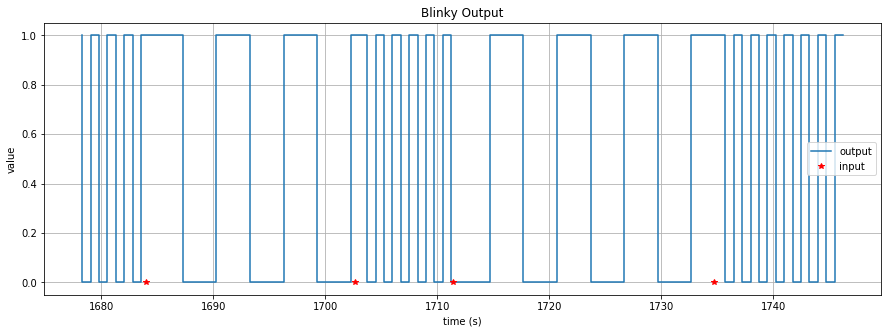

In [244]:
tblk = tblk_list
outblk = outblk_list
tdin = tdin_list
outdin = outdin_list

plt.figure(figsize=(15,5))
plt.step(tblk[5:],outblk[5:],label='output')
plt.plot(tdin[0:],outdin[0:],'r*',label='input')
plt.title('Blinky Output')
plt.xlabel('time (s)')
plt.ylabel('value')
plt.legend()
plt.grid(True)

In this case, we took advantage of the embedded ogging to verify that the application works as expected.

**Disclaimer**

To enable the logging for embedded simulations it is neccessary to increase the value for the constant `MISSED_DEADLINE_TOLERANCE` from its default value (500) to avoid missing a scheduled time advance deadline. This value is found in the `rt_clock.hpp` file.

<a id='next-steps'></a>
# Next steps

1. Study alternatives to `streamstrings` to transform states and outputs into string to handle them easily (such as `minimal-printf`). 
2. Analyze which information should be logged when running embedded to avoid unnecesary delays and to have both: **embedded log for debugging** and **reduced memory use.**
3. Consider if this alernative does also help cadmium (v1) to produce lighter executable files.
4. Try other options for debugging applications, such as OCD jointly with GDB (or a graphical variant).

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

# Extras

# Mbed-OS and the Arduino Bluepill board

We can use Mbed-OS with the Arduino Bluepill board. To program this board we can use the ST-Link board that comes with the NUCLEO-F103RB or NUCLEO-F401RE boards. In order to do this follows the steps [here](https://os.mbed.com/users/hudakz/code/STM32F103C8T6_Hello/):

1. Remove the two jumpers in connector CN2 in the ST-Link board
2. Connect the pins in the ST-Link board and the Bluepill as follows:
| Pin ST-Link (CN4) | Pin Bluepill |
|-------------------|--------------|
| SWCLK (2)         |    SWCLK     |
| GND (3)           |    GND       |
| SWDIO (4)         |    SWIO      |
| NRST (5)          |    R         |
3. Supply voltage to the Bluepill through the USB interface
4. Compile the code with target `NUCLEO_F103RB`:
```
mbed compile --target NUCLEO_F103RB --toolchain GCC_ARM --profile ../cadmium2.json
```
5. Then copy the executable from the `BUILD` folder to the device created in Linux after connecting the ST-Link board.

**NOTE** To program the bluepill with the ST-Link in a NUCLEO board, you will have to copy the executable in the USB device created after connecting the NUCLEO board. If it says that there is no much space, then remove and reconect the NUCLEO board from the USB and try to copy the file again.

Have in mind that even when the Arduino Bluepill is advertized as having 128kB of Flash memory, in general it is provided with 128kB. Therefore, the Blinky LED example with Cadmium v2 that occupies ~70kB runs perfectly. The onboard LED is wired to port PC_13 and for the switch I used PB_13.

<center><img src="img/Arduino-bluepill.jpg" alt="Bluepill" width="600"/></center>

## Serial terminal to read the logs

Mbed does also provide a serial terminal to communicate with the board:

In [116]:
%%bash
mbed sterm -h

usage: mbed sterm [-h] [-m TARGET] [-p PORT] [-b BAUDRATE] [-e ECHO] [-r] [-v]
                  [-vv]

Open serial terminal to connected target (usually board), or connect to a user-specified COM port

optional arguments:
  -h, --help            show this help message and exit
  -m TARGET, --target TARGET
                        Compile target MCU. Example: K64F, NUCLEO_F401RE,
                        NRF51822...
  -p PORT, --port PORT  Communication port. Default: auto-detect. Specifying
                        this will also ignore the -m/--target option above.
  -b BAUDRATE, --baudrate BAUDRATE
                        Communication baudrate. Default: 9600
  -e ECHO, --echo ECHO  Switch local echo on/off. Default: on
  -r, --reset           Reset the targets (via SendBreak) before opening
                        terminal.
  -v, --verbose         Verbose diagnostic output
  -vv, --very_verbose   Very verbose diagnostic output


`Mbed-OS` binds the standard output with the serial port attached to the USB-serial interface on the board. In Linux a device will be created with name `ttyACM0`.

Be sure that the baudrate is the same specified for `Mbed-OS` in the `mbed_app.json` file with the option `"platform.stdio-baud-rate"`.

## Built-in atomic models in Cadmium v2

Cadmium comes with some built-in atomic models to interact with the hardware:
* Digital Inputs
* Digital Outputs
* Analog Inputs
* Analog Outputs
* PWM Outputs
* Interrupt Inputs

These can be found under `cadmium/core/real_time/arm_mbed/io/`:

In [245]:
%%bash -s "$CADMIUMV2_SRC"

cd $1/real_time/arm_mbed/io
ls

analogInput.hpp
analogOutput.hpp
digitalInput.hpp
digitalOutput.hpp
interruptInput.hpp
pwmOutput.hpp


These atomic models make use of the [APIs](https://os.mbed.com/docs/mbed-os/v6.15/apis/index.html#:~:text=Input/Output%20drivers) provided by `Mbed-OS`.

So, let's take a look at the DigitalInput atomic model:

In [70]:
%%bash -s "$CADMIUMV2_SRC"

cd $1/real_time/arm_mbed/io
cat digitalInput.hpp

/**
* Jon Menard
* ARSLab - Carleton University
*
* Digital Input:
* Model to interface with a digital Input pin for Embedded Cadmium.
*/

#ifndef RT_DIGITALINPUT_TEST_HPP
#define RT_DIGITALINPUT_TEST_HPP

#ifndef NO_LOGGING
	#include <iostream>
#endif
#include <optional>
#include <cadmium/core/modeling/atomic.hpp>

#include <limits>
#include <math.h> 
#include <assert.h>
#include <memory>
#ifndef NO_LOGGING
	#include <iomanip>
	#include <iostream>
	#include <fstream>
#endif
#include <string>
#include <chrono>
#include <algorithm>
#include <limits>
#include <random>

#ifdef RT_ARM_MBED
#endif

#include "../mbed.h"
using namespace std;

namespace cadmium {
  
  struct DigitalInputState {
      bool output;
      bool last;
      double sigma;

      /**
      * Processor state constructor. By default, the processor is idling.
      * 
      */
      explicit DigitalInputState(): output(true), last(false), sigma(0){
      }

  }; 

#ifndef NO_LOGGING
  /**
     * Insertion operator for P

Where `DigitalIn` is a class provided by Mbed-OS. The corresponding documentation can be checked [here](https://os.mbed.com/docs/mbed-os/v6.15/apis/digitalin.html).

In case we want to add drivers to Mbed-OS, it is done by creating a folder `drivers/` in the root folder for our model and the put there the code for the driver.

A lot of drivers for Mbed-OS can be found easily by _googling_.

## Drivers for Mbed-OS

Drivers in mbed-os are located in the folder `mbed-os/drivers/`. There we can find: `AnalogIn`, `AnalogOut`, `DigitalIn`, `DigitalOut`, `PwmOut`, `I2C`, etc. Thiee drivers are used for instance for the atomics: [analogInput](https://github.com/SimulationEverywhere/cadmium_v2/blob/dev-rt/include/cadmium/core/real_time/arm_mbed/io/analogInput.hpp), [analogOutput](https://github.com/SimulationEverywhere/cadmium_v2/blob/dev-rt/include/cadmium/core/real_time/arm_mbed/io/analogOutput.hpp), [digitalInput](https://github.com/SimulationEverywhere/cadmium_v2/blob/dev-rt/include/cadmium/core/real_time/arm_mbed/io/digitalInput.hpp), [digitalOutput](https://github.com/SimulationEverywhere/cadmium_v2/blob/dev-rt/include/cadmium/core/real_time/arm_mbed/io/digitalOutput.hpp), [pwmOutput](https://github.com/SimulationEverywhere/cadmium_v2/blob/dev-rt/include/cadmium/core/real_time/arm_mbed/io/pwmOutput.hpp) in cadmium_v2 (`cadmium_v2/include/cadmium/core/real_time/arm_mbed/io/`). In addition, the sensor drivers developed for mbed-os make use of these drivers, for instance the driver for [sht31](https://os.mbed.com/users/andcor02/code/Sht31//file/c84a60326ecf/Sht31.h/) that depends on the mbed-os driver for [I2C](https://github.com/ARMmbed/mbed-os/blob/master/drivers/include/drivers/I2C.h).

Drivers APIs includes analog and digital inputs and outputs on development boards, as well as digital interfaces, which allow your board to interface with a computer or external devices, for instance: `AnalogIn`, `AnalogOut`, `DigitalIn`, `DigitalOut`, `PwmOut`, `I2C`. [Documentation](https://os.mbed.com/docs/mbed-os/v5.15/apis/drivers.html) for Drivers APIs.

The [Timer](https://github.com/SimulationEverywhere/cadmium_v2/blob/215d200666490af67372758eedaf7149c98ce53b/include/cadmium/core/real_time/rt_clock.hpp#L86) used for advancing the time in an embedded simulation is a [Driver](https://github.com/ARMmbed/mbed-os/blob/master/drivers/include/drivers/Timer.h) too.

Network Interfaces API. Documentation for [Network Interfaces](https://os.mbed.com/docs/mbed-os/v5.15/apis/network-interfaces.html) APIs. Among them, the WiFi API can be found [here](https://os.mbed.com/docs/mbed-os/v5.15/apis/wi-fi.html) along with an example of use.

Check the mbed-os version in `mbed_version.h` file under the `mbed-os/platform/` folder. The mbed-os 5 version will not be longer updated and its last update can be found [here](https://os.mbed.com/mbed-os/releases/#).

The resulting file to be downloaded in the board lies in the `BUILD/` folder. There you will also find the compiled drivers.

Under this folder, you will find a subfolder with the name of the **board**, for instance `NUCLEO_F401RE`, and the string `GCC_ARM` followed by the name of the profile, for instance for `cadmium.json` we have `GCC_ARM-CADMIUM`. So the path for the executable is: `/BUILD/NUCLEO_F401RE/GCC_ARM-CADMIUM`.

Under this folder you will find all the compiled `.o` files.

In [118]:
%%bash
mbed sterm -b 9600

[mbed] Working path "/home/piter/SED/demo-cadmiumv2" (directory)
[mbed] Detecting connected targets/boards to your system...
[mbed] Opening serial terminal to "NUCLEO_F401RE"
